In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [4]:
migration = pd.read_csv('migration_nz.csv')

In [5]:
# Print the first 5 rows.
migration.head(5)

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0


This dataset includes the following variables:

Measure — The signal type given in this row including “Arrivals”, “Departures”, “Net”.


Country — Country from where people arrived into New Zealand (for Measure = “Arrivals”) or to where they left (for Measure = “Departures”). Contains special values “Not Stated” and “All countries” (grand total).


Citizenship — Citizenship of the migrants including “New Zealand Citizen”, “Australian Citizen”, “Total All Citizenships”.


Year — Year of the measurement (arrival or departure).

Value — Number of migrants.

In [4]:
# Show information about the data columns.
migration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86526 entries, 0 to 86525
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measure      86526 non-null  object 
 1   Country      86526 non-null  object 
 2   Citizenship  86526 non-null  object 
 3   Year         86526 non-null  int64  
 4   Value        86454 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [6]:
migration.isna().sum()

Measure         0
Country         0
Citizenship     0
Year            0
Value          72
dtype: int64

Value column has 72 fields with null or missing values. We will replace these null values with the median value.

In [17]:
migration["Value"].fillna(migration["Value"].median(),inplace=True)

Check for unique values in the Measure column.

In [8]:
migration['Measure'].unique()

array(['Arrivals', 'Departures', 'Net'], dtype=object)

We need to translate some categorical data in preparation for running the machine learning model. First we will replace each of the unique string values in the Measure column with an integer value. Arrivals will have a value of 1, Departures will have a value of 2, and Net will have a value of 3.

In [9]:
migration['Measure'].replace("Arrivals",1,inplace=True)
migration['Measure'].replace("Departures",2,inplace=True)
migration['Measure'].replace("Net",3,inplace=True)

Check for unique values in the Country column.

In [10]:
migration['Country'].unique()


array(['Oceania', 'Antarctica', 'American Samoa', 'Australia',
       'Cocos Islands', 'Cook Islands', 'Christmas Island', 'Fiji',
       'Micronesia', 'Guam', 'Kiribati', 'Marshall Islands',
       'Northern Mariana Islands', 'New Caledonia', 'Norfolk Island',
       'Nauru', 'Niue', 'New Zealand', 'French Polynesia',
       'Papua New Guinea', 'Pitcairn Island', 'Palau', 'Solomon Islands',
       'French Southern Territories', 'Tokelau', 'Tonga', 'Tuvalu',
       'Vanuatu', 'Wallis and Futuna', 'Samoa', 'Asia', 'Afghanistan',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Brunei Darussalam',
       'Bhutan', 'China', 'Georgia', 'Hong Kong', 'Indonesia', 'India',
       'Japan', 'Kyrgyzstan', 'Cambodia', 'North Korea', 'South Korea',
       'Kazakhstan', 'Laos', 'Sri Lanka', 'Myanmar', 'Mongolia', 'Macau',
       'Maldives', 'Malaysia', 'Nepal', 'Philippines', 'Pakistan',
       'Singapore', 'Thailand', 'Tajikistan', 'Timor-Leste',
       'Turkmenistan', 'Taiwan', 'Uzbekistan', 'Vietn

There are 253 unique countries. We will replace each of the unique string values in the Country column with an integer value. We will use the Pandas factorize method to transform the data from text to numbers.

In [11]:
migration['Country'] = pd.factorize(migration.Country)[0]

Check for unique values in the Citizenship column.

In [12]:
migration['Citizenship'].unique()

array(['New Zealand Citizen', 'Australian Citizen',
       'Total All Citizenships'], dtype=object)

There are 3 unique citizenships. We will replace each of the unique string values in the Citizenship column with an integer value. New Zealand Citizen will have a value of 1, Australian Citizen will have a value of 2, and Total All Citizenships will have a value of 3.

In [13]:
migration['Citizenship'].replace('New Zealand Citizen',1,inplace=True)
migration['Citizenship'].replace('Australian Citizen',2,inplace=True)
migration['Citizenship'].replace('Total All Citizenships',3,inplace=True)

Visualizing the correlation between variables.

<AxesSubplot:>

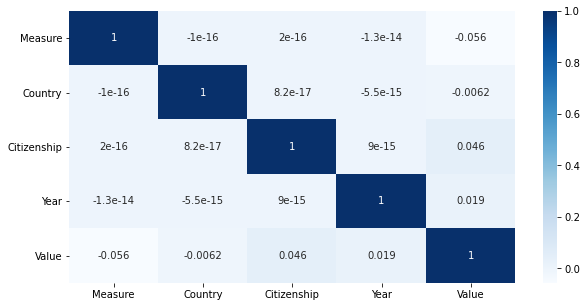

In [14]:
# We will use the Pearson Correlation method.
plt.figure(figsize=(10,5)) 
corr = migration.corr() 
sns.heatmap(corr, annot=True, cmap='Blues')

We will use Measure, Country, Citizenship and Year as the feature variables. We will use Value as the target variable.

Split the Data into Test and Training Data Sets

In [15]:
X = migration[['Country','Measure','Year','Citizenship']]
y = migration['Value']

In [18]:
migration.head(5)

,Measure,Country,Citizenship,Year,Value
0,1,0,1,1979,11817.0
1,1,0,2,1979,4436.0
2,1,0,3,1979,19965.0
3,1,1,1,1979,10.0
4,1,1,2,1979,0.0


In [23]:
from sklearn.datasets import load_iris

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
#Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=9)

In [24]:
# Initialize variables
learning_rate = 0.1
iterations = 5000
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 1  

results = pd.DataFrame(columns=["mse", "accuracy"])

In [25]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [28]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(x_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

<ipython-input-26-051ab1557158>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


MemoryError: Unable to allocate 27.3 GiB for an array with shape (60568, 60568) and data type float64

<AxesSubplot:>

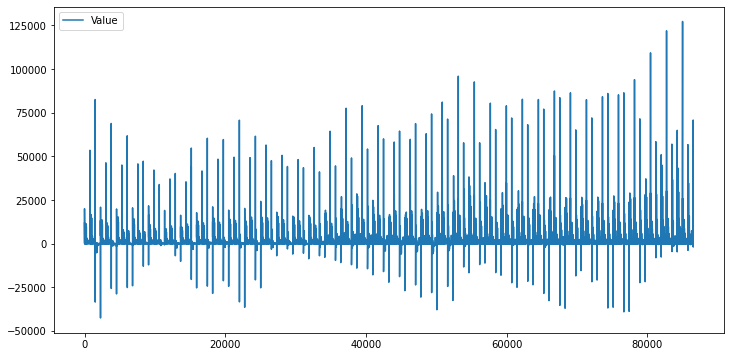

In [50]:
migration.plot(figsize=(12,6))

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

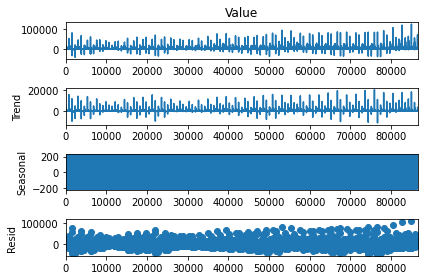

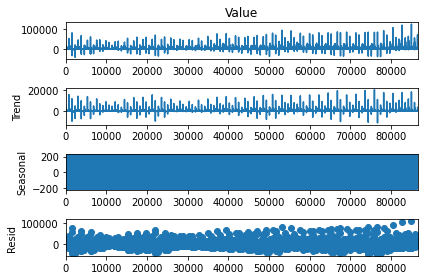

In [52]:
results = seasonal_decompose(migration['Value'],period=12)
results.plot()

In [29]:
migration = migration.tail(1000)
len(migration)

1000

In [30]:
train = migration.iloc[:760]
test = migration.iloc[760:]

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [33]:
scaled_train[:10]

array([[0.        , 0.68253968, 0.5       , 0.        , 0.06385964],
       [0.        , 0.68253968, 1.        , 0.        , 0.06387614],
       [0.        , 0.68650794, 0.        , 0.        , 0.06390915],
       [0.        , 0.68650794, 0.5       , 0.        , 0.06385964],
       [0.        , 0.68650794, 1.        , 0.        , 0.06390915],
       [0.        , 0.69047619, 0.        , 0.        , 0.06385964],
       [0.        , 0.69047619, 0.5       , 0.        , 0.06385964],
       [0.        , 0.69047619, 1.        , 0.        , 0.06385964],
       [0.        , 0.69444444, 0.        , 0.        , 0.07288813],
       [0.        , 0.69444444, 0.5       , 0.        , 0.06407421]])

In [34]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [43]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [44]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.68253968 0.5        0.         0.06385964 0.
 0.68253968 1.         0.         0.06387614 0.         0.68650794
 0.         0.         0.06390915]
Predict this y: 
 [[0.         0.68650794 0.5        0.         0.06385964]]


In [45]:
X.shape

(1, 3, 5)

In [46]:
# We do the same thing, but now instead for 12 mo
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [48]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               42000     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
_________________________________________________________________


In [49]:
# fit model
model.fit(generator,epochs=10)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/lstm_1/TensorArrayUnstack/TensorListFromTensor' defined at (most recent call last):
    File "C:\Users\Thushar\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Thushar\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Thushar\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Users\Thushar\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Users\Thushar\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Thushar\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\Thushar\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\Thushar\anaconda3\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\Thushar\anaconda3\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
      ret = callback()
    File "C:\Users\Thushar\anaconda3\lib\site-packages\tornado\gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\tornado\gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\Thushar\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\Thushar\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\Users\Thushar\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2894, in run_cell
      result = self._run_cell(
    File "C:\Users\Thushar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3165, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Thushar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Thushar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-49-413d01710757>", line 2, in <module>
      model.fit(generator,epochs=10)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\layers\rnn\base_rnn.py", line 553, in __call__
      return super().__call__(inputs, **kwargs)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\layers\rnn\lstm.py", line 625, in call
      last_output, outputs, states = backend.rnn(
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\backend.py", line 4939, in rnn
      input_ta = tuple(
    File "C:\Users\Thushar\anaconda3\lib\site-packages\keras\backend.py", line 4940, in <genexpr>
      ta.unstack(input_)
Node: 'sequential_1/lstm_1/TensorArrayUnstack/TensorListFromTensor'
Specified a list with shape [?,1] from a tensor with shape [1,5]
	 [[{{node sequential_1/lstm_1/TensorArrayUnstack/TensorListFromTensor}}]] [Op:__inference_train_function_3643]

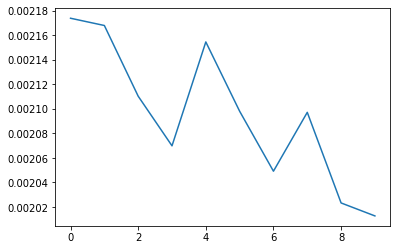

In [87]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [88]:
last_train_batch = scaled_train[-12:]

In [89]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [90]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 302ms/step


array([[0.06367774]], dtype=float32)

In [91]:
scaled_test[0]

array([0.06381012])

In [92]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


In [93]:
test_predictions

[array([0.06367774], dtype=float32),
 array([0.06371801], dtype=float32),
 array([0.06368531], dtype=float32),
 array([0.06366208], dtype=float32),
 array([0.06366305], dtype=float32),
 array([0.063668], dtype=float32),
 array([0.06367003], dtype=float32),
 array([0.06367127], dtype=float32),
 array([0.06367224], dtype=float32),
 array([0.0636727], dtype=float32),
 array([0.06367286], dtype=float32),
 array([0.06367313], dtype=float32),
 array([0.06367298], dtype=float32),
 array([0.06367301], dtype=float32),
 array([0.06367297], dtype=float32),
 array([0.06367295], dtype=float32),
 array([0.06367294], dtype=float32),
 array([0.06367294], dtype=float32),
 array([0.06367294], dtype=float32),
 array([0.06367294], dtype=float32),
 array([0.06367294], dtype=float32),
 array([0.06367294], dtype=float32),
 array([0.06367294], dtype=float32),
 array([0.06367294], dtype=float32),
 array([0.06367294], dtype=float32),
 array([0.06367294], dtype=float32),
 array([0.06367294], dtype=float32),
 arr

In [94]:
test.head()

,Value
86286,-3.0
86287,0.0
86288,-2.0
86289,0.0
86290,0.0


In [95]:
true_predictions = scaler.inverse_transform(test_predictions)

In [96]:
test['Predictions'] = true_predictions

<ipython-input-96-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:>

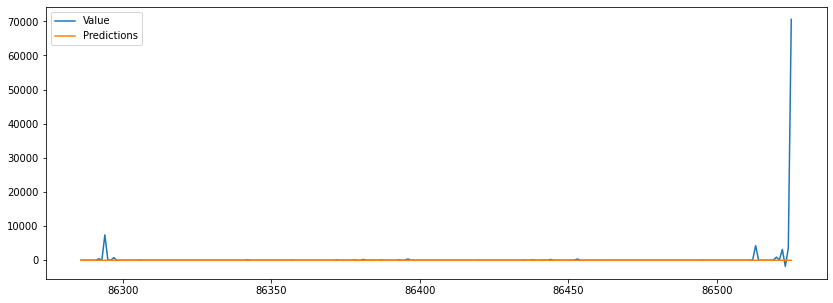

In [97]:
test.plot(figsize=(14,5))

In [99]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Value'],test['Predictions']))
print(rmse)

4603.454389805857
